In [ ]:
%cd drive/MyDrive/multimedia/hw1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q1

### Horizontal flip function

In [2]:
def flip_horizontally(img):
  flipped_img = cv2.flip(img, 1)
  return flipped_img

### Transpose function

In [3]:
def transpose(img):
  trans = np.transpose(img)
  return trans

### Crop function

In [4]:
def crop_25(img):
  row_25 = int(img.shape[0]*0.25)
  column_25 = int(img.shape[1]*0.25)
  cropped_img = img[row_25:img.shape[0]-row_25, column_25:img.shape[1]-column_25]
  return cropped_img

### All shift function

In [5]:
def shift_pixel(img, direction, n):
  shifted_img = np.zeros(img.shape)
  if direction == 'right':
    shifted_img[:,n:] = img[:, :img.shape[1]-n]
    shifted_img[:,:n] = img[:, img.shape[1]-n:]
  elif direction == 'left':
    shifted_img[:,:img.shape[1]-n] = img[:, n:]
    shifted_img[:,img.shape[1]-n:] = img[:, :n]
  elif direction == 'up':
    shifted_img[:img.shape[0]-n,:] = img[n:, :]
    shifted_img[img.shape[0]-n:,:] = img[:n, :]
  elif direction == 'down':
    shifted_img[n:,:] = img[:img.shape[0]-n, :]
    shifted_img[:n,:] = img[img.shape[0]-n:, :]
  elif direction == 'up_right':
    shifted_img = shift_pixel(img, 'up', n)
    shifted_img = shift_pixel(shifted_img, 'right', n)
  elif direction == 'up_left':
    shifted_img = shift_pixel(img, 'up', n)
    shifted_img = shift_pixel(shifted_img, 'left', n)
  elif direction == 'down_right':
    shifted_img = shift_pixel(img, 'down', n)
    shifted_img = shift_pixel(shifted_img, 'right', n)
  elif direction == 'down_left':
    shifted_img = shift_pixel(img, 'down', n)
    shifted_img = shift_pixel(shifted_img, 'left', n)
  else:
    print("Please detemine the direction!")
    return
  return shifted_img

## Question 1:

In [6]:
def call_all(img):
  flipped = flip_horizontally(img)
  transposed = transpose(img)
  cropped = crop_25(img)
  right = shift_pixel(img, 'right', 2)
  left = shift_pixel(img, 'left', 2)
  up = shift_pixel(img, 'up', 2)
  down = shift_pixel(img, 'down', 2)
  up_right = shift_pixel(img, 'up_right', 2)
  up_left = shift_pixel(img, 'up_left', 2)
  down_right = shift_pixel(img, 'down_right', 2)
  down_left = shift_pixel(img, 'down_left', 2)

  fig = plt.figure(figsize = (22, 22))
  fig.add_subplot(3, 4, 1)
  plt.title("Original Image")
  plt.imshow(img, cmap = 'gray')
  fig.add_subplot(3, 4, 2)
  plt.title("Flip horizontally")
  plt.imshow(flipped, cmap = 'gray')
  fig.add_subplot(3, 4, 3)
  plt.title("Transpose")
  plt.imshow(transposed, cmap = 'gray')
  fig.add_subplot(3, 4, 4)
  plt.title("Cropped")
  plt.imshow(cropped, cmap = 'gray')

  fig.add_subplot(3, 4, 5)
  plt.title("Right_shift")
  plt.imshow(right, cmap = 'gray')
  fig.add_subplot(3, 4, 6)
  plt.title("Left_shift")
  plt.imshow(left, cmap = 'gray')
  fig.add_subplot(3, 4, 7)
  plt.title("Up_shift")
  plt.imshow(up, cmap = 'gray')
  fig.add_subplot(3, 4, 8)
  plt.title("Down_shift")
  plt.imshow(down, cmap = 'gray')

  fig.add_subplot(3, 4, 9)
  plt.title("Diagonal_up_right")
  plt.imshow(up_right, cmap = 'gray')
  fig.add_subplot(3, 4, 10)
  plt.title("Diagonal_up_left")
  plt.imshow(up_left, cmap = 'gray')
  fig.add_subplot(3, 4, 11)
  plt.title("Diagonal_down_Right")
  plt.imshow(down_right, cmap = 'gray')
  fig.add_subplot(3, 4, 12)
  plt.title("Diagonal_down_left")
  plt.imshow(down_left, cmap = 'gray')
  plt.show()

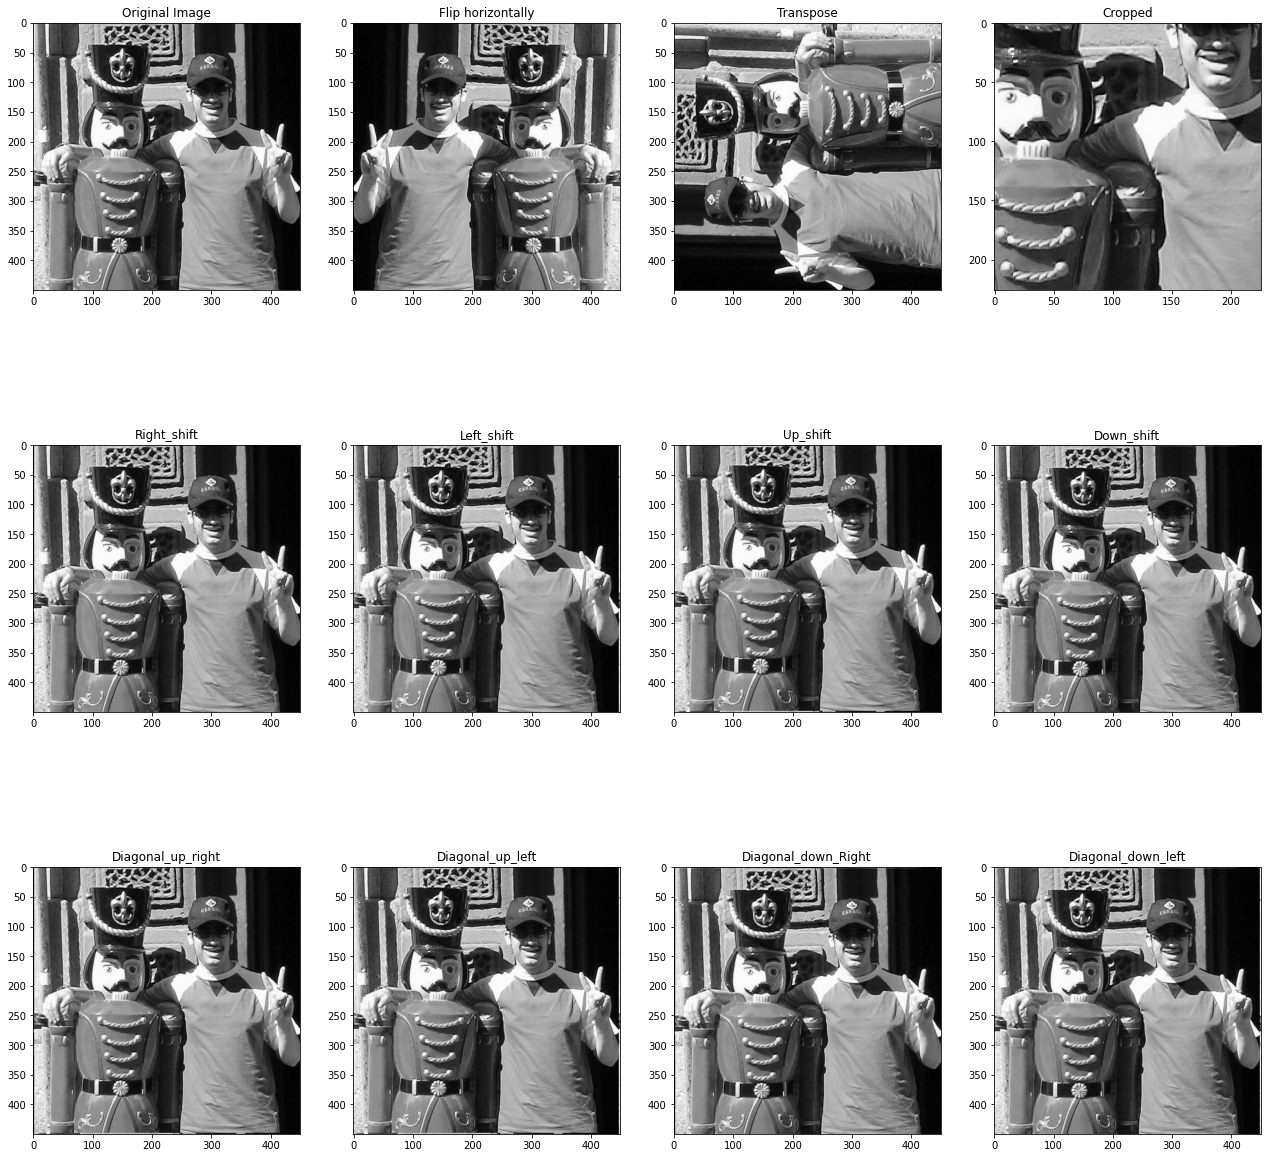

In [7]:
img = plt.imread('Hi.tif')
call_all(img)

# Q2

In [8]:
def HW1_MSE(img1, img2):
  return ((img1 - img2) ** 2).mean()

# Q3

In [9]:
def change_brightness_level(img, num):
  dec = img - num
  F = dec >= 0
  dec = F*dec
  return dec

In [10]:
dec_20 = change_brightness_level(img.astype(np.int32), 20)
mse_dec_20 = HW1_MSE(img.astype(np.int32), dec_20.astype(np.int32))
print(mse_dec_20)

359.4355851851852


In [14]:
right = shift_pixel(img, 'right', 2)
left = shift_pixel(img, 'left', 2)

right = right/2 + img/2
left = left/2 + img/2

mse_right = HW1_MSE(img.astype(np.int32), right.astype(np.int32))
mse_left = HW1_MSE(img.astype(np.int32), left.astype(np.int32))
print(mse_right)
print(mse_left)

317.28766913580245
317.3189086419753


# Q4

In [12]:
def imresize(img, scale_percent, interpolation):
  if interpolation == 'nearest':
    interpolation = cv2.INTER_NEAREST
  elif interpolation == 'bilinear':
    interpolation = cv2.INTER_LINEAR
  elif interpolation == 'bicubic':
    interpolation = cv2.INTER_CUBIC
  h = int(img.shape[0]*scale_percent / 100)
  w = int(img.shape[1]*scale_percent / 100)
  newdim = (h, w)
  resized = cv2.resize(img, newdim, interpolation = interpolation)
  return resized

In [13]:
resized_nearest = imresize(img, 80, 'nearest')
resized_bilinear = imresize(img, 80, 'bilinear')
resized_bicubic = imresize(img, 80, 'bicubic')

original_nearest = imresize(resized_nearest, 125, 'nearest')
original_bilinear = imresize(resized_bilinear, 125, 'bilinear')
original_bicubic = imresize(resized_bicubic, 125, 'bicubic')


mse_nearest = HW1_MSE(img.astype(np.int32), original_nearest.astype(np.int32))
mse_bilinear = HW1_MSE(img.astype(np.int32), original_bilinear.astype(np.int32))
mse_bicubic = HW1_MSE(img.astype(np.int32), original_bicubic.astype(np.int32))

print(mse_nearest)
print(mse_bilinear)
print(mse_bicubic)

592.2657283950617
63.0824987654321
18.399185185185186
